# Hmwk #5 - Regression Analysis

## Problem #1 - Trees

Foresters want to measure the volume of a tree in order to estimate how much lumber they would get for that tree. Knowing the girth and height of the tree, one could apply a cylinder approximation, but the tree does not have a uniform girth along its entire length -- the tree gets much smaller at the top. The UsingR library has a data set "trees", that contains a set of measurements of the girth and height of a tree. Use the library to assess a linear model. For example, you might try:

In [1]:
library(UsingR)
summary(trees)

ERROR: Error in library(UsingR): there is no package called ‘UsingR’


     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

** If we look at the regression model **

In [126]:
m = lm(Volume ~ Height + Girth, data=trees)
summary(m)


Call:
lm(formula = Volume ~ Height + Girth, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Height        0.3393     0.1302   2.607   0.0145 *  
Girth         4.7082     0.2643  17.816  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


This provides a model, but doesn't say if it's any good. Do the following using R -- i.e. use the output of the 'lm' linear model where possible. Show your work.

### What is the R^2 for this model

In [3]:
summary(m)$r.squared

[1] 0.94795

### Compute the 95% confidence interval for the Height parameter 
(**nb:** you're being asked to calculate the CI of the parameter from the multi-linear model, not the CI of the Height data itself). To do this, you would use the standard error (shown in the summary of the linear model -- e.g. 0.1302 for parameter Height) for each parameter -- this is the standard error for that parameter derived from the MSE as described in the slides concerning multi-linear regression. You would then conduct the T-distribution using that standard error with n-k-1 degrees of freedom. See the slides on linear regression.

In [135]:
length(trees$Height)
t = qt(1-0.05/2,32-2-1)
c = summary(m)$coefficients["Height",1]
e = summary(m)$coefficients["Height",2]
c + c(-1,1)*t*e

[1] 31

[1] 0.07306218 0.60544029

### Compute the 95% confidence interval for the Girth parameter 
(**nb:** as above). Verify your value using the **confint** function in R.

In [136]:
t = qt(1-0.05/2,32-2-1)
c = summary(m)$coefficients["Girth",1]
e = summary(m)$coefficients["Girth",2]
c + c(-1,1)*t*e
confint(m, level=0.95)

[1] 4.167679 5.248642

,2.5 %,97.5 %
(Intercept),-75.68226,-40.29306
Height,0.07264863,0.60585384
Girth,4.166839,5.249482


### Does the Height parameter statistically equal zero? Does the Girth?

Neither confidence interval includes 0, so neither is statistically equal to 0.

### Complete this sentence:
"For every unit increase in Girth, the Volume increases by ______ and for every unit increase in Height, the Volume increases by ______"

In [17]:
summary(m)$coefficients[2:3,1]

Height     Girth 
0.3392512 4.7081605

## Problem #2 - Body Fat

In [39]:
load("fat.Rda")

The Body Mass Index (BMI) is a model to predict the percentage of body fat based on your weight and height. The VMI is defined as the ratio of weight (in kilograms) to the square of height (in metres). A BMI of 18.5 to 25 is considered "healthy", a BMI of 25 to 30 is "overweight" and a BMI over 30 is "obese". The dataset 'fat' from UsingR contains 19 factors. The true body fat is body.fat and BMI field is the BMI.

### Using the 'fat' data set, build a linear model
of the body.fat predicted by BMI.
Describe the linear model -- what are the intercept and slope.
What is the $r^2$ of that model?


In [73]:
m = lm(body.fat ~ height^2, data=fat)
summary(m)$coefficients[,1]
summary(m)$r.squared

(Intercept)      height 
 32.1654232  -0.1885553

[1] 0.007939953

### Come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72
We will use these different factors to come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72. Each factor in the final model should be significant at the 95% level -- this means that the confidence interval of the parameter at the 95% confidence level should not include zero.

Include your description showing both your final result and the process by which you achieve that result. Your model shouldn't use the "density" or "body.fat.siri" factors, as those are the "gold standard" measurements used to calculate body fat (using a dunk tank). I'm not certain what "ffweight" is, but don't use that either.

You may want to understand the "p-value" for problem - basically, the p-value is the probability of observing a value at least as large as the "t-value" (which is the estimate / std. error). Effectively, this is providing a way to determine if that value is statistically equal to zero.

You should describe the process you use, not just the end result. You should also insure that the linear model is valid, meaning that the predictors are not correlated, etc. Wikipedia has a good article on such "stepwise refinement" mechanisms [ http://en.wikipedia.org/wiki/Stepwise_regression ]. See also the discussion on page 125 of the book by Faraway on Practical Regression Analysis using R (on the couse web page or http://cran.r-project.org/doc/contrib/Faraway-PRA.pdf). They describe a "backward" and "forward" mechanism where you either start with all terms & toss some away or start adding terms to a null model.

In [84]:
str(fat)

'data.frame':	252 obs. of  19 variables:
 $ case         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ body.fat     : num  12.6 6.9 24.6 10.9 27.8 20.6 19 12.8 5.1 12 ...
 $ body.fat.siri: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ density      : num  1.07 1.09 1.04 1.08 1.03 ...
 $ age          : int  23 22 22 26 24 24 26 25 25 23 ...
 $ weight       : num  154 173 154 185 184 ...
 $ height       : num  67.8 72.2 66.2 72.2 71.2 ...
 $ BMI          : num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ ffweight     : num  135 161 116 165 133 ...
 $ neck         : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ chest        : num  93.1 93.6 95.8 101.8 97.3 ...
 $ abdomen      : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ hip          : num  94.5 98.7 99.2 101.2 101.9 ...
 $ thigh        : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ knee         : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ankle        : num  21.9 23.4 

In [145]:
m = lm(body.fat ~ age + weight + height + h2 + neck + chest + abdomen + hip + thigh + knee + ankle + bicep + forearm + wrist, data = fat)
summary(m)
confint(m,level=0.95)


Call:
lm(formula = body.fat ~ age + weight + height + h2 + neck + chest + 
    abdomen + hip + thigh + knee + ankle + bicep + forearm + 
    wrist, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2564  -2.5666  -0.0936   2.8862   9.3551 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.335e+01  1.912e+01  -0.698  0.48561    
age          5.680e-02  3.003e-02   1.892  0.05976 .  
weight      -8.569e-02  5.735e-02  -1.494  0.13642    
height      -1.616e-01  5.234e-01  -0.309  0.75785    
h2           8.725e-04  4.641e-03   0.188  0.85104    
neck        -4.306e-01  2.189e-01  -1.968  0.05028 .  
chest       -1.901e-02  9.522e-02  -0.200  0.84194    
abdomen      8.902e-01  8.419e-02  10.574  < 2e-16 ***
hip         -1.963e-01  1.359e-01  -1.445  0.14976    
thigh        2.364e-01  1.361e-01   1.737  0.08375 .  
knee        -2.040e-02  2.293e-01  -0.089  0.92921    
ankle        1.669e-01  2.063e-01   0.809  0.41943    
bicep

,2.5 %,97.5 %
(Intercept),-51.02278,24.31450
age,-0.002353842,0.115948556
weight,-0.19866746,0.02727878
height,-1.1927555,0.8696195
h2,-0.008270864,0.010015937
neck,-0.8618192271,0.0005310809
chest,-0.2065884,0.1685728
abdomen,0.7243645,1.0560758
hip,-0.46403146,0.07133146
thigh,-0.03177231,0.50462279


In [146]:
m = lm(body.fat ~ abdomen + forearm + wrist,data=fat)
summary(m)$r.squared
confint(m,level=0.95)

[1] 0.7029125

,2.5 %,97.5 %
(Intercept),-19.053785,2.669796
abdomen,0.6281773,0.7562157
forearm,-0.1871929,0.4742528
wrist,-3.040072,-1.463612


In [147]:
m = lm(body.fat ~ abdomen + wrist,data=fat)
summary(m)$r.squared
confint(m,level=0.95)
cor(fat$abdomen,fat$wrist)

[1] 0.7020373

,2.5 %,97.5 %
(Intercept),-17.754735,3.431597
abdomen,0.6359201,0.7607330
wrist,-2.834614,-1.393002


[1] 0.6198324

In [152]:
m = lm(body.fat ~ abdomen + wrist + height + h2,data=fat)
summary(m)$r.squared
confint(m,level=0.95)
cor(fat$abdomen, h2)
cor(fat$wrist,h2)

[1] 0.7166618

,2.5 %,97.5 %
(Intercept),-54.889347,4.295542
abdomen,0.6250186,0.7487134
wrist,-2.3562793,-0.8303911
height,-0.1973408,1.5174551
h2,-0.0145030207,-0.0003298232


[1] 0.1171955

[1] 0.357071

In [154]:
m = lm(body.fat ~ abdomen + wrist + h2,data=fat)
summary(m)$r.squared
confint(m,level=0.95)

[1] 0.7140244

,2.5 %,97.5 %
(Intercept),-14.587406,6.563599
abdomen,0.6220438,0.7458244
wrist,-2.4197546,-0.8997127
h2,-0.0032957945,-0.0007961312


In [157]:
m = lm(body.fat ~ (abdomen + wrist + h2)* weight,data=fat)
summary(m)$r.squared
confint(m,level=0.95)
cor(fat$abdomen,fat$weight)
cor(fat$wrist,fat$weight)
cor(h2,fat$weight)

[1] 0.7485841

,2.5 %,97.5 %
(Intercept),-108.35268,11.47358
abdomen,0.8360607,1.4720587
wrist,-6.178059,3.148614
h2,-0.009790570,0.009155918
weight,-0.2051791,0.4429732
abdomen:weight,-0.0034225124,-0.0001016918
wrist:weight,-0.02441947,0.02646968
h2:weight,-5.460715e-05,4.284472e-05


[1] 0.8879949

[1] 0.7297749

[1] 0.3682796

In [165]:
m = lm(body.fat ~ abdomen*weight,data=fat)
summary(m)$r.squared

[1] 0.7314134

## Problem #3 - Wireless networks

This data contains measurements from 3 wireless network devices. One is an 802.11 "Wifi" interface running at 1Mbs/s. The second is that same interface running at 11Mb/s. Lastly, the same interface running at 54Mb/s. The data is stored as R vectors named x1, y1, x11, y11 and x54, y54. The X value is the packet size for the time measurement recorded at the corresponding Y value. The units are milliseconds. For example, x11[1] is 350 bytes and y11[1] is 1.436782 millseconds. It took 1.436782 milliseconds to transmit a 350 byte packet.

In [173]:
x11 = c(350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550, 550,
550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850, 850,
850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050, 1050,
1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250, 1350,
1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450 )

y11 = c(
1.436782, 1.407063, 1.436782, 1.426737, 1.416832, 1.50015, 1.533978,
1.50015, 1.522533, 1.511259, 1.619433, 1.619433, 1.576541, 1.576541,
1.587050, 1.682935, 1.662787, 1.693193, 1.682935, 1.693193, 1.745505,
1.755310, 1.765225, 1.755310, 1.755002, 1.833853, 1.805054, 1.824152,
1.853568, 1.853568, 1.915342, 1.915342, 1.915342, 1.904762, 1.915342,
1.992429, 1.982161, 1.992429, 1.961169, 1.971998, 2.072539, 2.052124,
2.062281, 2.062281, 2.082466, 2.15378, 2.143623, 2.133561, 2.113718,
2.103934, 2.182453, 2.182453, 2.182453, 2.154244, 2.182453, 2.241147,
2.26142, 2.241147, 2.301496, 2.282063)

x1 = c( 350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550,
550, 550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850,
850, 850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050,
1050, 1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250,
1350, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450)

y1 = c( 4.161465, 4.078303, 4.078303, 4.078303, 4.078303, 4.741584,
4.741584, 4.741584, 4.741584, 4.741584, 5.534034, 5.534034, 5.534034,
5.534034, 5.534034, 6.30517, 6.30517, 6.30517, 6.30517, 6.30517,
7.097232, 7.097232, 7.097232, 6.939625, 7.097232, 7.830854, 7.830854,
7.830854, 7.830854, 7.830854, 8.403361, 8.403361, 8.403361, 8.403361,
8.403361, 9.14913, 9.14913, 9.14913, 9.14913, 9.14913, 9.910803,
9.910803, 9.910803, 9.910803, 9.910803, 10.81081, 10.81081, 10.55966,
10.81081, 10.81081, 11.60093, 11.60093, 11.33787, 11.33787, 11.33787,
12.16545, 12.16545, 12.16545, 12.16545, 12.16545)

x54 = c( 350, 350, 350, 350, 450, 450, 450, 450, 550, 550, 550, 550,
650, 650, 650, 650, 750, 750, 750, 750, 850, 850, 850, 850, 950, 950,
950, 950, 1050, 1050, 1050, 1050, 1150, 1150, 1150, 1150, 1250, 1250,
1250, 1250, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450)

y54 = c( 0.2812386, 0.2804341, 0.2798769, 0.2815553, 0.2995088,
0.2986679, 0.3006705, 0.298454, 0.311886, 0.3199386, 0.3163556,
0.3186439, 0.3333333, 0.3369953, 0.3340236, 0.3311258, 0.3412969,
0.3373933, 0.341006, 0.3411456, 0.3531198, 0.3563284, 0.3578714,
0.3521871, 0.3733154, 0.3752768, 0.3761803, 0.3780432, 0.3957888,
0.3914660, 0.3928656, 0.3961651, 0.4116921, 0.4088307, 0.4083966,
0.4038935, 0.4210704, 0.4251339, 0.4259488, 0.4252243, 0.4428698,
0.4405869, 0.4386157, 0.4402959, 0.4577287, 0.4561211, 0.4573938,
0.4607658)

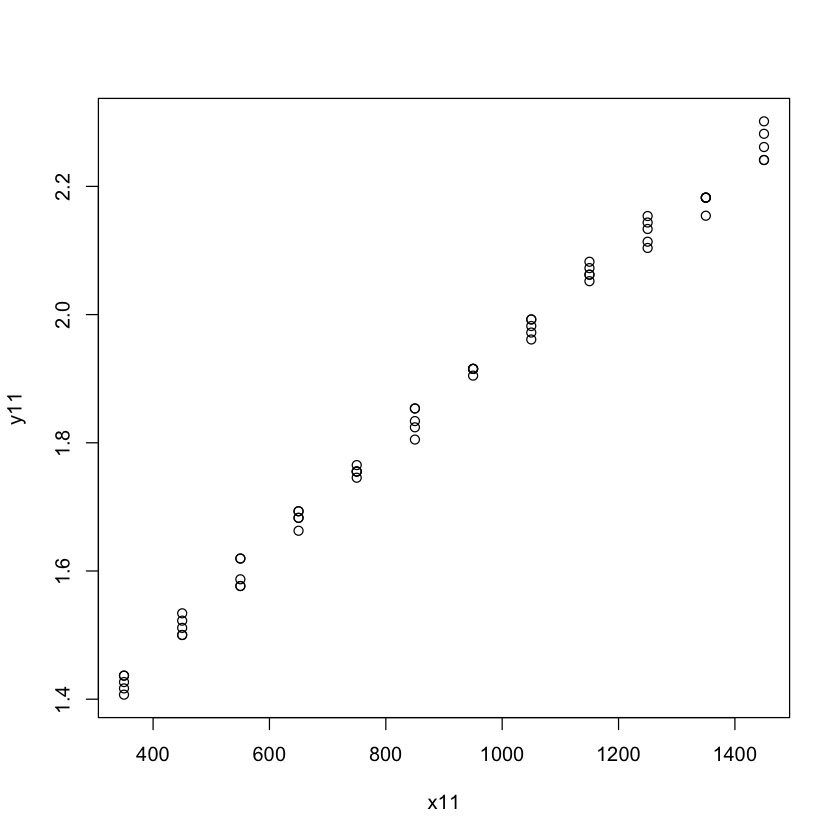

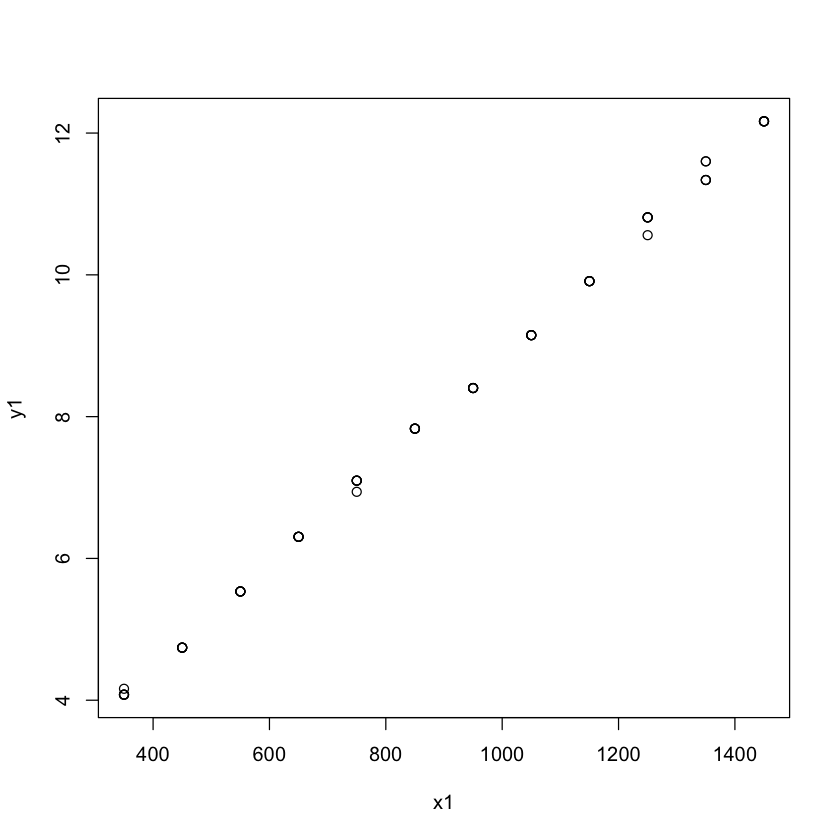

In [111]:
plot(x11,y11)
plot(x1,y1)

### Answer the following questions:

To answer these questions, you should use the lecture slides on linear regression and section 13 from the SimpleR.pdf book from the course website (page 77). You can also refer to the material by Boudec, but his write-up is, as per normal, complex.

* Using R as a calculator, but not using the built-in regression functions, calculate using the equations in the Linear Regression slides:
* The slope (b) and intercept (a) of the regression model for the 1Mb/s network (using x1, y1)
* The coefficient of determination for the model for the 1Mb/s network (using x1,y1)
* The standard deviation for slope & intercept and the 95% confidence interval for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval for the predicted time to transmit a 40 byte Wifi packet for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval to transmit a 750 byte packet for the 1Mb/s network (using x1,y1)

In [171]:
intercept = function(x,y){
    n = length(x)
    sy = sum(y)
    sx = sum(x)
    sx2 = sum(x^2)
    sxy = sum(x*y)
    (sy*sx2-sx*sxy)/(n*sx2 - sx^2)
}
slope = function(x,y){
    n = length(x)
    sy = sum(y)
    sx = sum(x)
    sx2 = sum(x^2)
    sxy = sum(x*y)
    (n*sxy-sx*sy)/(n*sx2 - sx^2)    
}
cod = function(x,y){
    n = length(x) - 1
    mx = mean(x)
    my = mean(y)
    (sum((x-mx)*(y-my))/(n*(sd(x)*sd(y))))^2
}
ci = function(x,y) {
    t = qt(1-0.05/2,(length(x)-2)
    c = slope(x,y)
    e = summary(m)$coefficients["Girth",2]
    c + c(-1,1)*t*e
}
intercept(x1,y1)
slope(x1,y1)
cod(x1,y1)
m = lm(y1 ~ x1)
m
summary(m)$r.squared

[1] 1.492115

[1] 0.007361049

[1] 0.9991551


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
   1.492115     0.007361  


[1] 0.9991551

### Settle a law suit

Using the 'lm' functions in R or the simple.lm functions from the UsingR package (documented in the Simple R guide, section 13 page 77), answer the following questions
* Prepare a plot of the data, the regression model and the 95% confidence interval for each of the data sets. Label the plot with the parameters of the regression model. If you plot all the data on a single plot, you can put the parameters in the legend rather than the title.
* Larry the Lawyer wants to sue because the 11Mb/s network is not 11 times "faster" than the 1Mb/s network. Compare the slope (time per byte) and intercept (overhead per packet). Is the 11Mb/s network 11 times faster at a 95% confidence level? Is the overhead different?
* Using your models, predict the time to transmit a 40 byte packet using each network (using a 95% confidence interval). What's Larry doing now (i.e. crying or filiing a suit?)
* Repeat that for a 750 and 1500 byte packet. Does Larry still have a case? What if you compare the time to transmit a 40 byte packet to a 1500 byte packet, which is 37 times bigger?
* For the 54Mb/s data, argue that the regression model is or is not appropriate for the data. Use the full range of techniques described in Jain and in class. Are there specific measurement samples which seem to be more problematic than others? Which ones?

In [183]:
l1 = lm(y1 ~ x1)
l11 = lm(y11 ~ x11)
l54 = lm(y54 ~ x54)
l1
l11
l54
confint(l1)
confint(l11)
confint(l54)


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
   1.492115     0.007361  



Call:
lm(formula = y11 ~ x11)

Coefficients:
(Intercept)          x11  
  1.1810648    0.0007561  



Call:
lm(formula = y54 ~ x54)

Coefficients:
(Intercept)          x54  
  0.2263869    0.0001583  


,2.5 %,97.5 %
(Intercept),1.437881,1.546349
x1,0.007304786,0.007417312


,2.5 %,97.5 %
(Intercept),1.166855,1.195275
x11,0.0007413121,0.0007707959


,2.5 %,97.5 %
(Intercept),0.2234496,0.2293243
x54,0.0001552897,0.0001613841


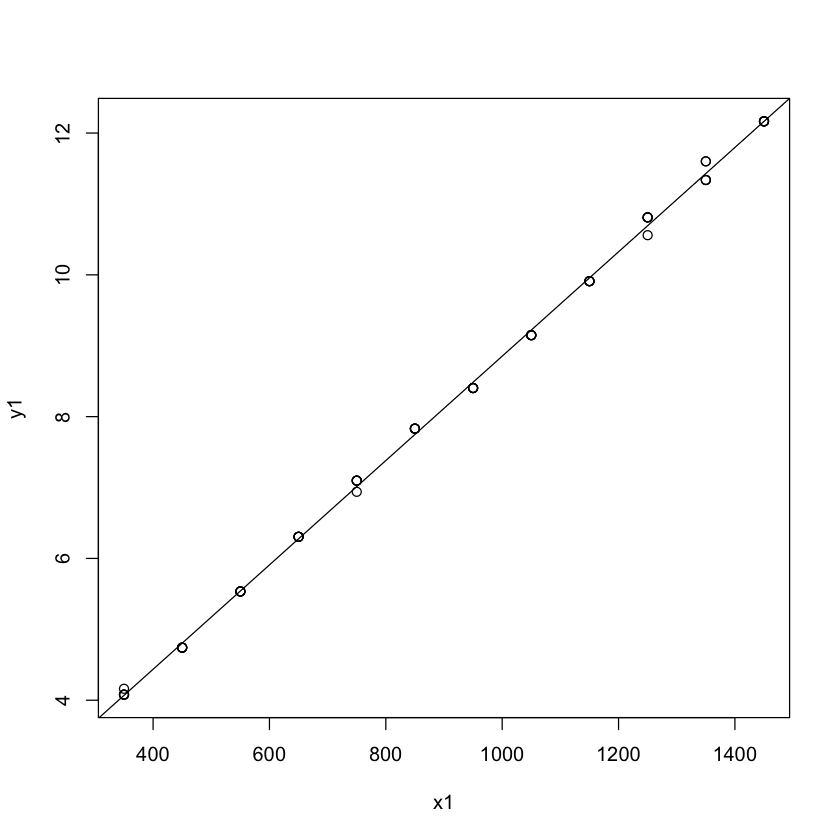

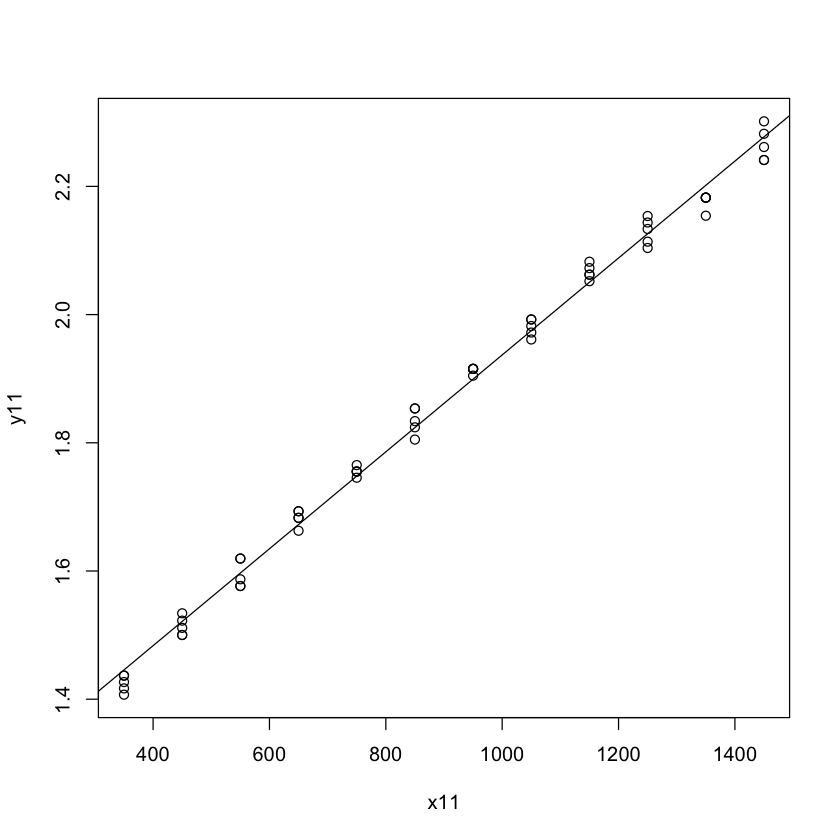

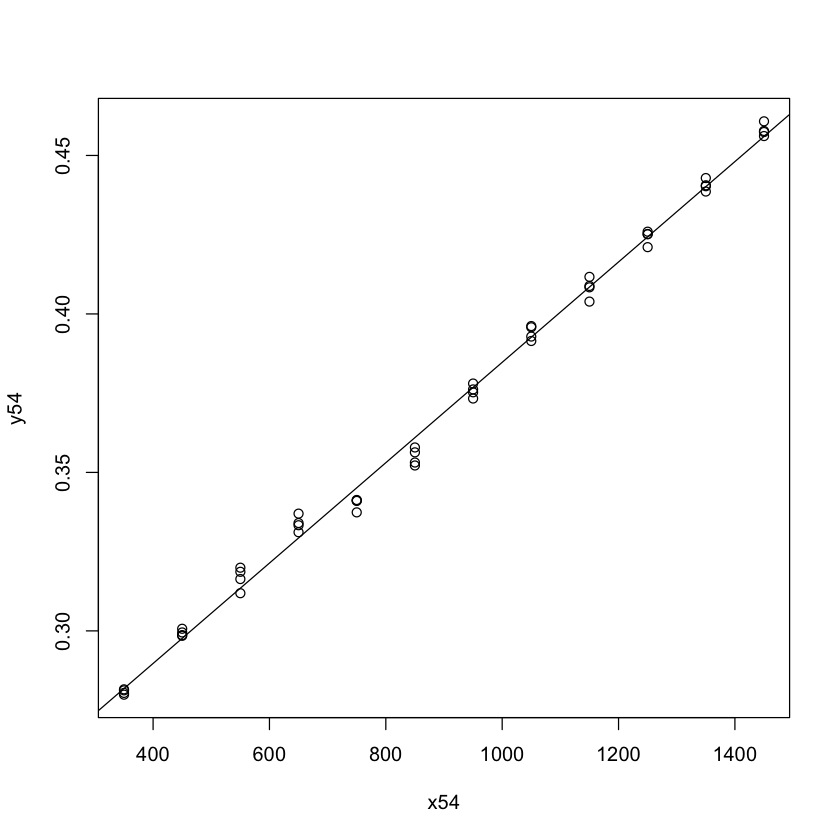

In [184]:
plot(x1,y1)
abline(l1)
plot(x11,y11)
abline(l11)
plot(x54,y54)
abline(l54)

In [185]:
1/l1$coefficients["x1"] *11
1/l11$coefficients["x11"]

x1 
1494.352

x11 
1322.657

In [193]:
predict = function(x,m){
    cn = confint(m)
    c(cn[1,1] + cn[2,1]*x,cn[1,2] + cn[2,2]*x)
}
predict(40,l1)
predict(40,l11) *11
predict(40,l54) *54

[1] 1.730072 1.843041

[1] 13.16158 13.48718

[1] 12.4017 12.7321

In [194]:
predict(750,l1)
predict(750,l11) *11
predict(750,l54) *54
predict(1500,l1)
predict(1500,l11) *11
predict(1500,l54) *54

[1] 6.916470 7.109333

[1] 18.95123 19.50709

[1] 18.35551 18.91957

[1] 12.39506 12.67232

[1] 25.06705 25.86616

[1] 24.64474 25.45563

In [197]:
predict(40,l1) *37
predict(1500,l1)

[1] 64.01268 68.19252

[1] 12.39506 12.67232

The 11Mb/s protocal is not 11 times faster than the 1Mb/s protocal. The slopes are nearly in this range, but the intercept dominates, preventing the speedy transfer.